In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

In [17]:
# Read in the image
image = mpimg.imread('car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

Image dimensions: (450, 660, 3)


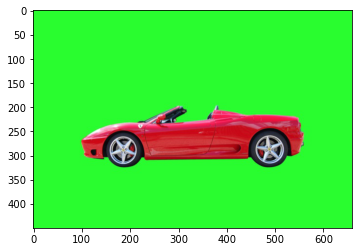

In [18]:
# Display the image
plt.imshow(image)

In [20]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,200,0]) 
upper_green = np.array([250,255,250])

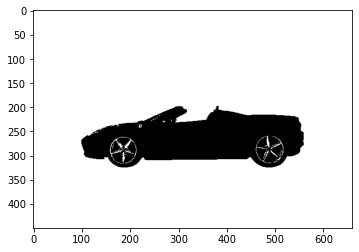

In [21]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

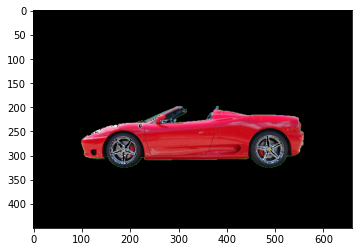

In [22]:
# Mask the image to let the pizza show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

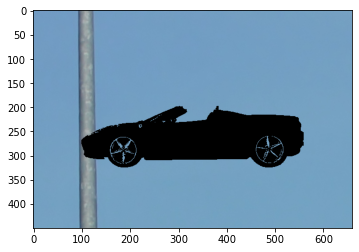

In [23]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('wa_state_highway.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:450, 0:660]

# Mask the cropped background so that the Car area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

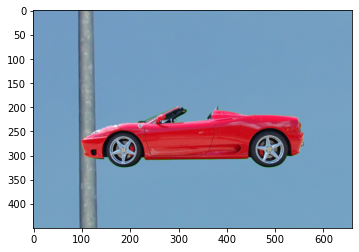

In [24]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)